<a href="https://colab.research.google.com/github/irenesubin/Embedded/blob/main/BAI_FaceRecPCA_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as pylab

In [ ]:
from numpy.core.fromnumeric import shape
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces().data
print(faces,shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]] <function shape at 0x7ff095295680>


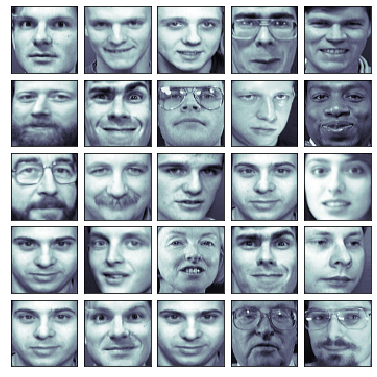

In [ ]:
fig = pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0,top=1, hspace=0.1, wspace=0.1)

j=1

np.random.seed(0)
for i in np.random.choice(faces.shape[0],25):
  ax = fig.add_subplot(5,5,j,xticks=[],yticks=[])
  face = np.reshape(faces[i,:],(64,64))
  ax.imshow(face,cmap='bone', interpolation='nearest')
  j +=1
pylab.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_comp = 400
pipeline = Pipeline([('scaling',StandardScaler()),('pca',PCA(n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape)

mean_face = np.reshape(pipeline.named_steps['scaling'].mean_,(64,64))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (64,64))

(400, 400)


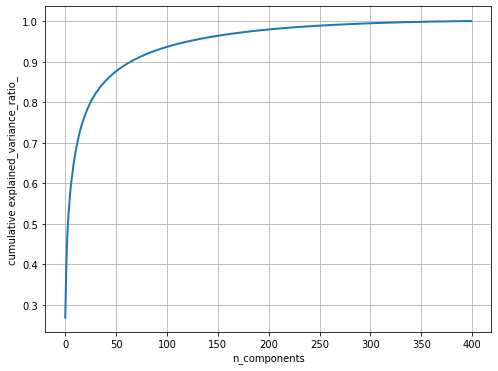

In [ ]:
pylab.figure(figsize=(8,6))
variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_
pylab.plot(np.cumsum(variance_ratio), linewidth=2)
pylab.grid(), pylab.axis('tight'),pylab.xlabel('n_components')
pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()

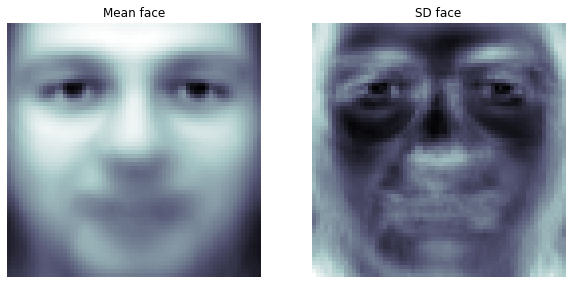

In [ ]:
pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face, cmap='bone')
pylab.axis('off'), pylab.title('Mean face')
pylab.subplot(122), pylab.imshow(sd_face, cmap='bone')
pylab.axis('off'), pylab.title('SD face')
pylab.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_comp = 64
pipeline = Pipeline([('scaling',StandardScaler()),('pca',PCA(n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape)

mean_face = np.reshape(pipeline.named_steps['scaling'].mean_,(64,64))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (64,64))

(400, 64)


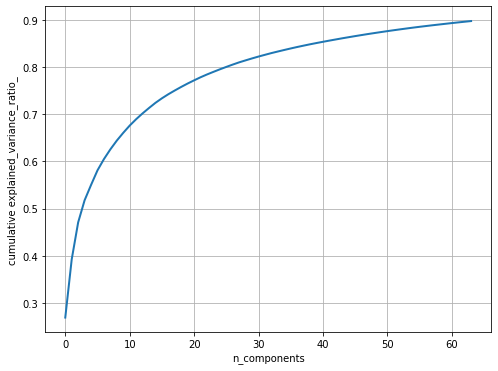

In [ ]:
pylab.figure(figsize=(8,6))
variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_
pylab.plot(np.cumsum(variance_ratio), linewidth=2)
pylab.grid(), pylab.axis('tight'),pylab.xlabel('n_components')
pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()

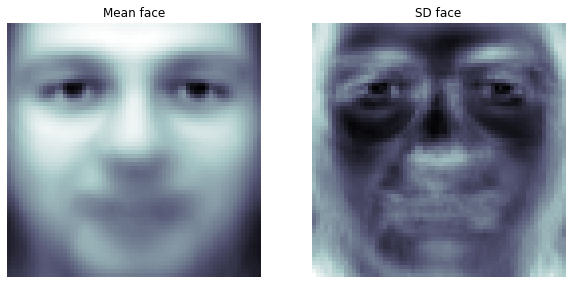

In [ ]:
pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face, cmap='bone')
pylab.axis('off'), pylab.title('Mean face')
pylab.subplot(122), pylab.imshow(sd_face, cmap='bone')
pylab.axis('off'), pylab.title('SD face')
pylab.show()

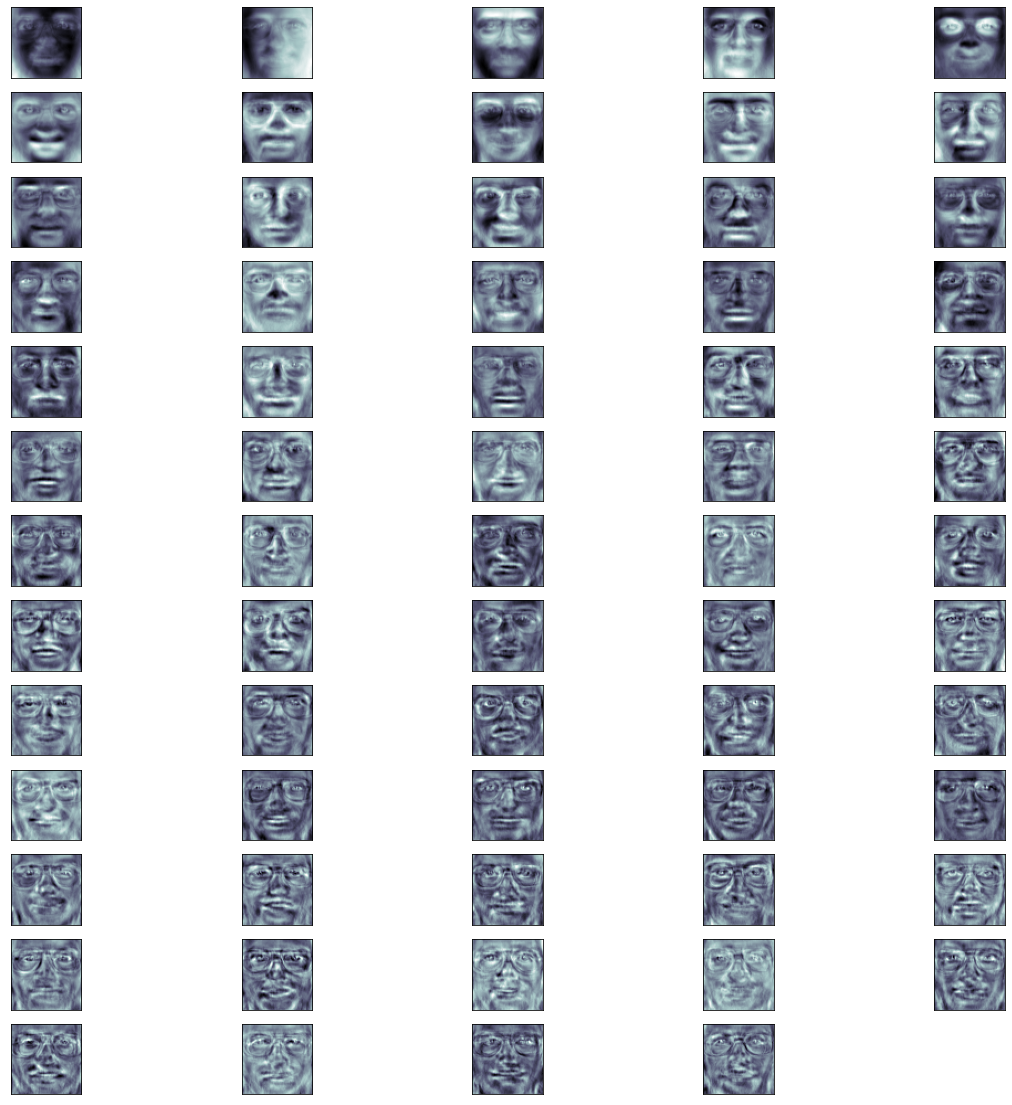

In [ ]:
fig= pylab.figure(figsize=(20,20))
for i in range (64):
  face = np.reshape(pipeline.named_steps['pca'].components_[i,:],(64,64))
  ax= fig.add_subplot(13,5,i+1,xticks=[],yticks=[])
  ax.imshow(face,cmap='bone')
pylab.show()

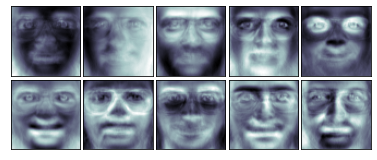

In [ ]:
fig = pylab.figure(figsize=(5,2))
fig.subplots_adjust(left=0,right=1,bottom=0, top=1, hspace=0.05,wspace=0.05)
for i in range(10):
  face = np.reshape(pipeline.named_steps['pca'].components_[i,:],(64,64))
  ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
  ax.imshow(face,cmap='bone')
pylab.show()

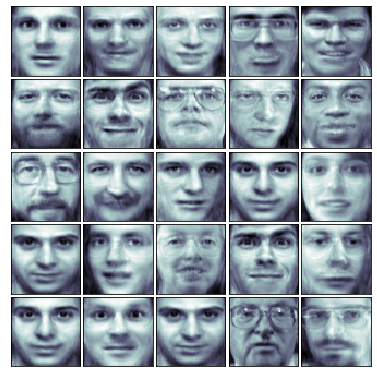

In [ ]:
faces_inv_proj = pipeline.named_steps['pca'].inverse_transform(faces_proj)
faces_inv_proj = np.reshape(faces_inv_proj,(400,64,64))


fig = pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0,top=1, hspace=0.05, wspace=0.05)

j=1

np.random.seed(0)
for i in np.random.choice(faces.shape[0],25):
  ax = fig.add_subplot(5,5,j,xticks=[],yticks=[])
  reconst_face = mean_face+sd_face*faces_inv_proj[i,:]
  ax.imshow(reconst_face,cmap='bone', interpolation='nearest')
  j +=1
pylab.show()

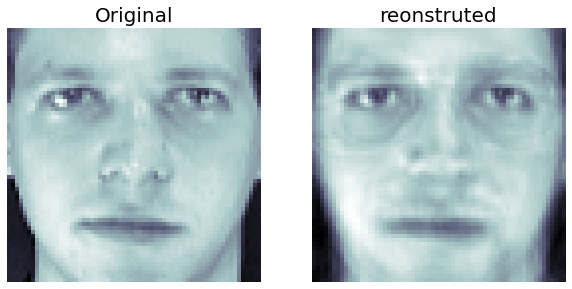

In [ ]:
orig_face=np.reshape(faces[0,:],(64,64))
reconst_face = mean_face+sd_face*faces_inv_proj[0,:]

pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.axis('off'), pylab.title('Original', size=20)
pylab.imshow(orig_face, cmap='bone', interpolation='nearest')
pylab.subplot(122), pylab.axis('off'), pylab.title('reonstruted', size=20)
pylab.imshow(reconst_face, cmap='bone', interpolation='nearest')
pylab.show()

In [ ]:
orig_face=np.reshape(faces[0,:],(64,64))
reconst_face = mean_face+sd_face*faces_inv_proj[0,:]

D= np.sqrt(np.sum((orig_face-reconst_face)**2))
print(D)

2.8779878976901787


In [ ]:
reconst_face0 = mean_face+sd_face*faces_inv_proj[0,:]
reconst_face1 = mean_face+sd_face*faces_inv_proj[1,:]

D= np.sqrt(np.sum((reconst_face0-reconst_face1)**2))
print(D)

12.042175539366086


In [ ]:
reconst_face0 = mean_face+sd_face*faces_inv_proj[0,:]
reconst_face2 = mean_face+sd_face*faces_inv_proj[2,:]

D= np.sqrt(np.sum((reconst_face0-reconst_face2)**2))
print(D)

4.95608199116137


In [ ]:
reconst_face0 = mean_face+sd_face*faces_inv_proj[0,:]
reconst_face3 = mean_face+sd_face*faces_inv_proj[3,:]

D= np.sqrt(np.sum((reconst_face0-reconst_face3)**2))
print(D)

13.96195261419179


In [ ]:
reconst_face0 = mean_face+sd_face*faces_inv_proj[0,:]
reconst_face4 = mean_face+sd_face*faces_inv_proj[4,:]

D= np.sqrt(np.sum((reconst_face0-reconst_face4)**2))
print(D)

9.667111479276342


In [ ]:
reconst_face0 = mean_face+sd_face*faces_inv_proj[0,:]
reconst_face20 = mean_face+sd_face*faces_inv_proj[20,:]

D= np.sqrt(np.sum((reconst_face0-reconst_face20)**2))
print(D)

13.23065781908701


------------------------------------------

In [ ]:
!pip install qiskit

     |████████████████████████████████| 6.5 MB 3.8 MB/s 
     |████████████████████████████████| 18.0 MB 99 kB/s 
     |████████████████████████████████| 238 kB 57.2 MB/s 
     |████████████████████████████████| 200 kB 49.4 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 1.6 MB 55.4 MB/s 
     |████████████████████████████████| 943 kB 45.4 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 38.2 MB 1.4 MB/s 
     |████████████████████████████████| 3.6 MB 23.0 MB/s 
     |████████████████████████████████| 113 kB 57.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=06d57a0daa352497673926beab9e4c0e3b45cf6cd525360312dacdaa76f0b4ad
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c94

In [ ]:
X_1 = [0,1,2,3,4]
X_2 = [2.8,12.0,4.9,13.9,9.6]
X_1 = X_1 - np.average(X_1)
X_2 = (X_2 - np.average(X_2))
print('The rescaled feature vectors are')
print('X_1 = ', X_1)
print('X_2 = ', X_2)

The rescaled feature vectors are
X_1 =  [-2. -1.  0.  1.  2.]
X_2 =  [-5.84  3.36 -3.74  5.26  0.96]


In [ ]:
M=np.array([[np.dot(X_1,X_1),np.dot(X_1,X_2)],[np.dot(X_2,X_1),np.dot(X_2,X_2)]]) / (15-1)
print('The covariance matrix is', 'M = \n', M)

The covariance matrix is M = 
 [[0.71428571 1.10714286]
 [1.10714286 6.28371429]]


In [ ]:
rho = M / np.trace(M)
print('The density matrix is \n', rho)

The density matrix is 
 [[0.10206998 0.15820847]
 [0.15820847 0.89793002]]


In [ ]:
rho_eig_val, rho_eig_vec = np.linalg.eig(rho)
p_vec = np.concatenate((np.sqrt(rho_eig_val), np.sqrt(rho_eig_val)), axis=0)
U_vec = rho_eig_vec.reshape((4))
psi = p_vec * U_vec
print('The purified state is \n', psi)
rho_partial_trace = np.dot(psi.reshape((2,2)),psi.reshape((2,2)).transpose())
print('Verify the reduction to the original mixed state \n', rho_partial_trace)

The purified state is 
 [-0.26312395 -0.18120642  0.05038805 -0.94625106]
Verify the reduction to the original mixed state 
 [[0.10206998 0.15820847]
 [0.15820847 0.89793002]]


In [ ]:
from qiskit import QuantumCircuit, execute, Aer, assemble

circ = QuantumCircuit(5, 1)
circ.initialize([1,0], (0,))
circ.initialize(psi, (1,2))
circ.initialize(psi, (3,4))
circ.h(0)
circ.cswap(0,1,3)
circ.h(0)
circ.measure(0,0)
circ.draw()

┌─────────────────┐                 ┌───┐   ┌───┐┌─┐
q_0: ────────────────┤ Initialize(1,0) ├─────────────────┤ H ├─■─┤ H ├┤M├
     ┌───────────────┴─────────────────┴────────────────┐└───┘ │ └───┘└╥┘
q_1: ┤0                                                 ├──────X───────╫─
     │  Initialize(-0.26312,-0.18121,0.050388,-0.94625) │      │       ║ 
q_2: ┤1                                                 ├──────┼───────╫─
     ├──────────────────────────────────────────────────┤      │       ║ 
q_3: ┤0                                                 ├──────X───────╫─
     │  Initialize(-0.26312,-0.18121,0.050388,-0.94625) │              ║ 
q_4: ┤1                                                 ├──────────────╫─
     └──────────────────────────────────────────────────┘              ║ 
c: 1/══════════════════════════════════════════════════════════════════╩═
                                                                       0

In [ ]:
# Tell Qiskit how to simulate our circuit
sim = Aer.get_backend('aer_simulator')
# Tell simulator to save statevector
circ.save_statevector()
# Create a Qobj from the circuit for the simulator to run
qobj = assemble(circ)
counts = sim.run(qobj, shots=1e+7).result().get_counts()
print(counts)

{'1': 666148, '0': 9333852}


In [ ]:
purity = (counts['0'] - counts['1']) / (counts['0'] + counts['1'])
m_1 = (1 + np.sqrt(2 * purity - 1)) / 2 * np.trace(M)
m_2 = (1 - np.sqrt(2 * purity - 1)) / 2 * np.trace(M)
print('The eigenvalues obtained by the quantum PCA are \n', [m_1, m_2])

The eigenvalues obtained by the quantum PCA are 
 [6.4957884056003685, 0.5022115943996308]


In [ ]:
m, vec = np.linalg.eig(M)
idx = m.argsort()[::-1]
m = m[idx]
vec = vec[:,idx]
print('The eigenvalues obtained by classical diagonalization are \n', m)

The eigenvalues obtained by classical diagonalization are 
 [6.49573138 0.50226862]


--------------------------------------------------

people.images의 형태 
(3023, 87, 65)
class 갯수 
62


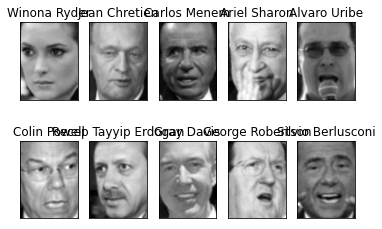

In [ ]:
# library import

from sklearn.datasets import fetch_lfw_people # fetch_lfw_people library

import matplotlib.pyplot as plt

import matplotlib

import numpy as np



# matplotlib 설정

matplotlib.rc('font', family='AppleGothic') # 한글출력

plt.rcParams['axes.unicode_minus'] = False # 축 - 표시




people = fetch_lfw_people(min_faces_per_person=20, resize=0.7, color=False) # 추출된 사진의 서로 다른 얼굴의 수, 사진 비율, 흑백여부

image_shape = people.images[0].shape # people객체 image의 첫번째 원소의 모양

print('people.images의 형태 \n{}'.format(people.images.shape)) # people객체의 image 형태: (3023, 87, 65)

print('class 갯수 \n{}'.format(len(people.target_names))) # people객체의 class 갯수, 62



fig, axes = plt.subplots(2, 5, # figure객체와 2x5의 plot객체를 각각 할당

                         subplot_kw={'xticks': (), 'yticks': ()}) # subplot의 축 설정; x축 눈굼없게, y축 눈금없게



# axes.ravel() : 리스트를 1차원으로

for target, image, ax in zip(people.target, people.images, axes.ravel()): # people.target, people.images, axes.ravel()에서 하나씩 원소 할당

    ax.imshow(image) # imshow로 그림 출력

    ax.set_title(people.target_names[target]) # 각 subplot의 타이틀

plt.gray() # 그림 흑백

plt.show() # 그래프 출력

In [ ]:
# 각 target이 나타난 횟수 계산

counts = np.bincount(people.target) # people.target의 빈도 계산



# target별 이름과 횟수 출력

### enumerate() : 각 원소에 인덱스 부여

### print('{0:25}, {1:3}').format(var1, var2):  첫번째 {}에 var1과 25자리까지, 두번째{}에 var2와 3자리를 부여

### print({0!s}.format(var1)): print문에 전달된 형식이 숫자라도 문자로 처리

print('frequency')

for i, (count, name) in enumerate(zip(counts, people.target_names)):

    print('{0:25} {1:3}'.format(name, count), end= '\t') # name에서 25자리, count에서 3자리, 끝은 탭

    if (i + 1) % 3 == 0: # 3의 배수이면, 즉 4번째 원소부터

        print() # 개행처리



# Geoge W Bush와 Colin Powell의 이미지가 많음을 확인



### 데이터셋의 편중을 막기 위해 50개의 이미지만 선택

mask = np.zeros(people.target.shape, dtype=np.bool) # 3023개의 boolean타입 False 생성



people_unique = np.unique(people.target) # 중복된 값 제외

for target in people_unique: # 중복을 제거한 target리스트에서 한개의 원소 선택

# people.target(3023개의 리스트)중 선택된 원소와 같은 것만 출력 ==> [0] 리스트의 원소로 접근 ==> False의 갯수 50개까지 출력

# 이 논리 값을 mask의 인덱스로 사용 후 True로 변환

    mask[np.where(people.target == target)[0][:50]] = 1
x_people = people.data[mask] # 훈련 데이터 생성

y_people = people.target[mask] # 테스트 데이터 생성



# 전처리 메소드 import

from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()

x_people_scaled = scaler.fit_transform(x_people) # 전처리 메소드 적용



# 머신 러닝 library import

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split



# 전처리한 데이터를 분할

x_train, x_test, y_train, y_test = \
  train_test_split(x_people_scaled, y_people, # 분할할 데이터
  stratify=y_people, random_state=0) # 그룹화할 데이터, 랜덤상태



# 머신 러닝 라이브러리 import

knn = KNeighborsClassifier(n_neighbors=1) # 이웃의 수

knn.fit(x_train, y_train) # 모델 학습



print('knn.score(x_test, y_test) \n최근접이웃의 일반화 세트 점수: {:.3f}'.format(

    knn.score(x_test, y_test))) # 0.248

frequency
Alejandro Toledo           39	Alvaro Uribe               35	Amelie Mauresmo            21	
Andre Agassi               36	Angelina Jolie             20	Ariel Sharon               77	
Arnold Schwarzenegger      42	Atal Bihari Vajpayee       24	Bill Clinton               29	
Carlos Menem               21	Colin Powell              236	David Beckham              31	
Donald Rumsfeld           121	George Robertson           22	George W Bush             530	
Gerhard Schroeder         109	Gloria Macapagal Arroyo    44	Gray Davis                 26	
Guillermo Coria            30	Hamid Karzai               22	Hans Blix                  39	
Hugo Chavez                71	Igor Ivanov                20	Jack Straw                 28	
Jacques Chirac             52	Jean Chretien              55	Jennifer Aniston           21	
Jennifer Capriati          42	Jennifer Lopez             21	Jeremy Greenstock          24	
Jiang Zemin                20	John Ashcroft              53	John Negroponte     

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 4.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=a72fd73958ebfb0e474dd04485ce8b6c83c1d70be1b29fbacb8e1ee0cdf60949
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


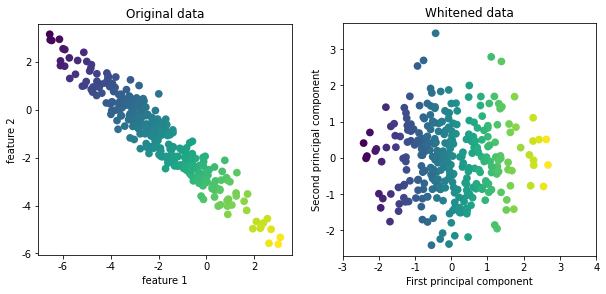

In [ ]:
# library import

import mglearn

mglearn.plots.plot_pca_whitening()

plt.show()

x_train_pca.shape 
train형태:(1547, 100)
x_test_pca.shape 
test형태:(516, 100)
테스트 세트 정확도: 
0.314
pca.components_.shape 
(100, 5655)


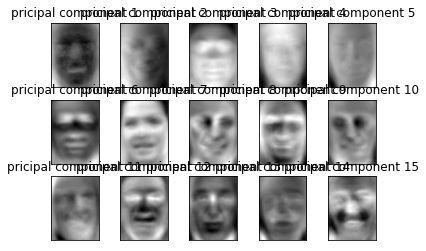

In [ ]:
# library import

from sklearn.decomposition import PCA



# PCA 모델 생성 및 적용

pca = PCA(n_components=100, whiten=True, random_state=0) # 주성분 갯수, whitening option, 랜덤상태

pca.fit(x_train) # PCA 학습

x_train_pca = pca.transform(x_train) # PCA를 데이터에 적용

x_test_pca = pca.transform(x_test)



# PCA를 적용한 데이터 형태

print('x_train_pca.shape \ntrain형태:{}'.format(x_train_pca.shape)) # (1547, 100)

print('x_test_pca.shape \ntest형태:{}'.format(x_test_pca.shape)) # (516, 100)



# 머신 러닝 모델 생성 및 학습

knn = KNeighborsClassifier(n_neighbors=1) # 이웃의 수

knn.fit(x_train_pca, y_train) # 모델 학습

print('테스트 세트 정확도: \n{:.3f}'.format(knn.score(x_test_pca, y_test))) # 0.314






print('pca.components_.shape \n{}'.format(pca.components_.shape)) # (100, 5655)



fig, axes = plt.subplots(3, 5, # subplot 3x5를 axes에 할당

                         subplot_kw={'xticks': (), 'yticks': ()}) # subplot 축 설정



for i, (comp, ax) in enumerate(zip(pca.components_, axes.ravel())): # pca.components_와 axes.ravel()을 하나씩 순서대로 할당한 후 인덱스 부여

    ax.imshow(comp.reshape(image_shape)) # image_shape= (87, 65)

    ax.set_title('pricipal component {}'.format(i+1)) # image title

plt.gray() # 사진 흑백

plt.show() # 사진 출력

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.538058, ..., 0.243137],
       ...,
       [0.043307, ..., 0.596078]], dtype=float32), 
array([[0.238845, ..., 0.269281],
       ...,
       [0.401575, ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 6.6s, 0.1min


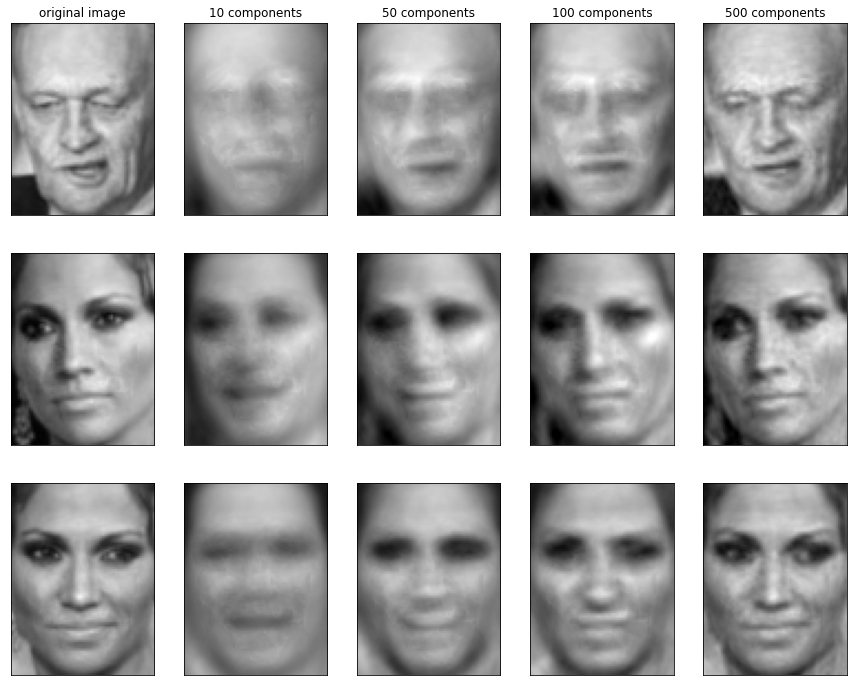

In [ ]:
mglearn.plots.plot_pca_faces(x_train, x_test, image_shape) # 훈련데이터, 테스트데이터, 이미지크기(87x65)

plt.gray() # 그림 흑백

plt.show() # 그림 출력
